Number of detected cells: 30


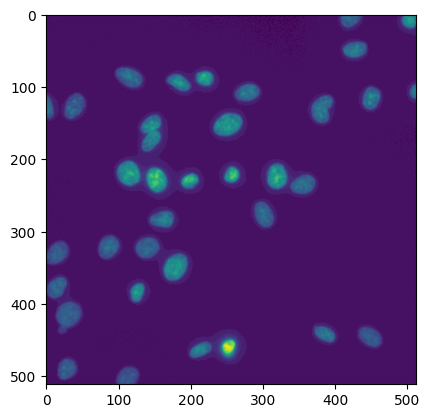

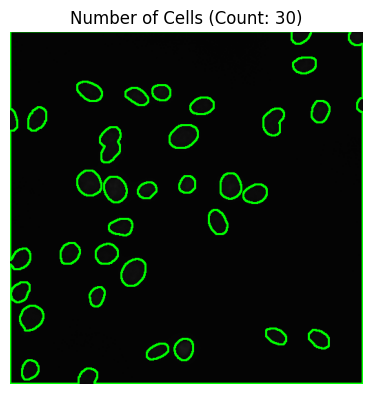

In [2]:
#(Dr. Xu submission) Converts Hoechst-stained cell image:
#Makes image easier to identify cells (similar to ImageJ mechanics), draws bright contrasts around & counts cells

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Read the image in grayscale 
img1Gray = cv2.imread('22_Image.tif', cv2.IMREAD_GRAYSCALE) 
plt.imshow(img1Gray) #display image

def detect_cells(img1Gray):
    #Gaussian blur = noise reduction, easier for program to read image 
    blurred_image = cv2.GaussianBlur(img1Gray, (5, 5), 0)

    #Otsu thresholding: optimal threshold value for segmentation 
    _, otsu_thresh = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) #finding threshold values in low-level scan, values inverse of scan 

    #Morphological operations to clean up the binary image, np.ones = array of shape/type in ones 
    kernel = np.ones((3, 3), np.uint8) #array with specific data type
    morph_image = cv2.morphologyEx(otsu_thresh, cv2.MORPH_CLOSE, kernel, iterations=2) #MORPH_CLOSE: removes holes in foreground; iterations: number of times applied

    contours, _ = cv2.findContours(morph_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #RETR_TREE: retrieves contours #CHAIN_APPROX_SIMPLE: simplifies contours 

    #Count # of contours
    num_contours = len(contours) #len
    print(f"Number of detected cells: {num_contours}")
    # Convert grayscale image to draw colored contours
    img_contours = cv2.cvtColor(img1Gray, cv2.COLOR_GRAY2BGR)

    # Draw contours on the original image
    cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)  # Green contours

    # Plot the Otsu-thresholded image and the image with contours
    plt.figure(figsize=(10, 5))

    # Display the image with contours
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
    plt.title(f'Number of Cells (Count: {num_contours})') #string
    plt.axis('off')

    # Show the images
    plt.show()


detect_cells(img1Gray) 


Number of detected cells: 30
Brightest Point Location: (248, 458), Brightness Value: 26.0


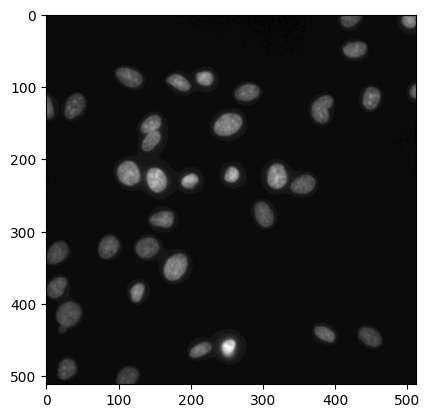

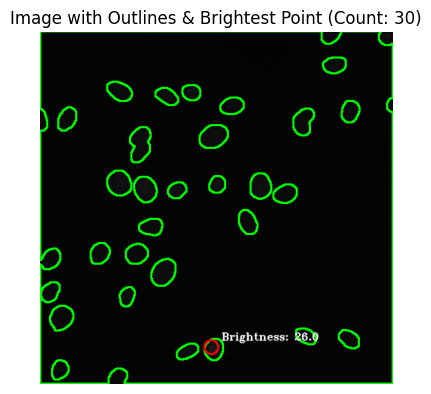

In [1]:
#Detect amount of cells & brightness in Hoechst-stained cell image: 
#Yields B&W image of scan & red radius of brightest area, its brightness value

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale!
img1Gray = cv2.imread('22_Image.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(img1Gray, cmap='gray')

def detect_cells(img1Gray):
    # Gaussian blur for noise reduction
    blurred_image = cv2.GaussianBlur(img1Gray, (5, 5), 0)

    # Apply Otsu thresholding
    _, otsu_thresh = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Morphological operations to clean up the binary image
    kernel = np.ones((3, 3), np.uint8)
    morph_image = cv2.morphologyEx(otsu_thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Find contours
    contours, _ = cv2.findContours(morph_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Count contours
    num_contours = len(contours)
    print(f"Number of detected cells: {num_contours}")

    # Convert grayscale image to draw colored contours
    img_contours = cv2.cvtColor(img1Gray, cv2.COLOR_GRAY2BGR)

    # Draw contours on the image
    cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)  # Green contours

    # Find the brightest point
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(img1Gray)
    print(f"Brightest Point Location: {max_loc}, Brightness Value: {max_val}")

    # Highlight the brightest point with a red circle
    cv2.circle(img_contours, max_loc, radius=10, color=(0, 0, 255), thickness=2)  # Red circle

    # Add brightness value as text
    font = cv2.FONT_HERSHEY_TRIPLEX 
    text = f'Brightness: {max_val}'
    cv2.putText(img_contours, text, (max_loc[0] + 15, max_loc[1] - 10), font, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

    # Plot the image with contours and the brightest point
    plt.figure(figsize=(10, 5))

    # Display the image with contours
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
    plt.title(f'Image with Outlines & Brightest Point (Count: {num_contours})')
    plt.axis('off')

    # Show the images
    plt.show()

detect_cells(img1Gray)
